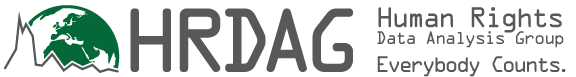

In [13]:
from IPython.display import Image
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from ast import literal_eval


Image(filename='../data/banner.png')

In [14]:
# import tables

# allContext (iterate over all of the content within the document with one api call)

data_sonnet_fullcontext = pd.read_csv('../data/allContext/results_claude-3-5-sonnet-20240620.csv')
data_sonnet_fullcontext['analysis_type'] = 'fullcontext_sonnet'

data_haiku_fullcontext = pd.read_csv('../data/allContext/results_claude-3-haiku-20240307.csv')
data_haiku_fullcontext['analysis_type'] = 'fullcontext_haiku'

data_opus_fullcontext = pd.read_csv('../data/allContext/results_claude-3-opus-20240229.csv')
data_opus_fullcontext['analysis_type'] = 'fullcontext_opus'

# AllPages (iterate over each page with one api call per page)

data_haiku = pd.read_csv('../data/allPages/results_claude-3-haiku-20240307.csv')
data_haiku['analysis_type'] = 'allpages_haiku'

data_sonnet = pd.read_csv('../data/allPages/results_claude-3-5-sonnet-20240620.csv')
data_sonnet['analysis_type'] = 'allpages_sonnet'

data_mixtral_7b = pd.read_csv('../data/allPages/Mixtral-8x7B-Instruct-v0.1.csv')
data_mixtral_7b['analysis_type'] = 'allpages_mixtral_7b'

data_mixtral_22b = pd.read_csv('../data/allPages/Mixtral-8x22B-Instruct-v0.1.csv')
data_mixtral_22b['analysis_type'] = 'allpages_mixtral_22b'

# use Named Entity Recognition (NER) to calculate the number of entities on each page as a preprocessing step. 
# It then processes the document in three separate iterations. 
# In each iteration, it focuses on different top fractions of pages containing the most entities: 
# first the top 1/4th, then the top 1/2, and finally the top 3/4ths of the document. 
# For each fraction, the script identifies the pages with the highest number of entities and then iterates over each of those pages, 
# similar to the allPages script, to extract the entities.

data_haiku_25 = pd.read_csv('../data/ner/results_claude-3-haiku-20240307-25per.csv')
data_haiku_25['analysis_type'] = 'ner_25_haiku'

data_haiku_50 = pd.read_csv('../data/ner/results_claude-3-haiku-20240307-50per.csv')
data_haiku_50['analysis_type'] = 'ner_50_haiku'

data_haiku_75 = pd.read_csv('../data/ner/results_claude-3-haiku-20240307-75per.csv')
data_haiku_75['analysis_type'] = 'ner_75_haiku'

data_sonnet_25 = pd.read_csv('../data/ner/results_claude-3-5-sonnet-20240620-25per.csv')
data_sonnet_25['analysis_type'] = 'ner_25_sonnet'

data_sonnet_50 = pd.read_csv('../data/ner/results_claude-3-5-sonnet-20240620-50per.csv')
data_sonnet_50['analysis_type'] = 'ner_50_sonnet'

data_sonnet_75 = pd.read_csv('../data/ner/results_claude-3-5-sonnet-20240620-75per.csv')
data_sonnet_75['analysis_type'] = 'ner_75_sonnet'

data_mixtral_7b_25 = pd.read_csv('../data/ner/Mixtral-8x7B-Instruct-v0.1-25per.csv')
data_mixtral_7b_25['analysis_type'] = 'ner_25_mixtral_7b'

data_mixtral_7b_50 = pd.read_csv('../data/ner/Mixtral-8x7B-Instruct-v0.1-50per.csv')
data_mixtral_7b_50['analysis_type'] = 'ner_50_mixtral_7b'

data_mixtral_7b_75 = pd.read_csv('../data/ner/Mixtral-8x7B-Instruct-v0.1-75per.csv')
data_mixtral_7b_75['analysis_type'] = 'ner_75_mixtral_7b'

data_mixtral_22b_25 = pd.read_csv('../data/ner/Mixtral-8x22B-Instruct-v0.1-25per.csv')
data_mixtral_22b_25['analysis_type'] = 'ner_25_mixtral_22b'

data_mixtral_22b_50 = pd.read_csv('../data/ner/Mixtral-8x22B-Instruct-v0.1-50per.csv')
data_mixtral_22b_50['analysis_type'] = 'ner_50_mixtral_22b'

data_mixtral_22b_75 = pd.read_csv('../data/ner/Mixtral-8x22B-Instruct-v0.1-75per.csv')
data_mixtral_22b_75['analysis_type'] = 'ner_75_mixtral_22b'

data_haiku_vision = pd.read_csv("../data/Vision/results_claude-3-haiku-20240307.csv")
data_haiku_vision['analysis_type'] = 'haiku_vision_allpages'
data_sonnet_vision = pd.read_csv("../data/Vision/results_claude-3-5-sonnet-20240620.csv")
data_sonnet_vision['analysis_type'] = 'sonnet_vision_allpages'

# Concatenate all DataFrames
all_data = pd.concat([
    data_sonnet_fullcontext, data_haiku_fullcontext, data_opus_fullcontext,
    data_haiku, data_sonnet, data_mixtral_7b, data_mixtral_22b,
    data_haiku_25, data_haiku_50, data_haiku_75,
    data_sonnet_25, data_sonnet_50, data_sonnet_75,
    data_mixtral_7b_25, data_mixtral_7b_50, data_mixtral_7b_75,
    data_mixtral_22b_25, data_mixtral_22b_50, data_mixtral_22b_75, data_haiku_vision, data_sonnet_vision
])

# Remove the specified columns
columns_to_remove = ['Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
                     'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
                     'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0']

all_data = all_data.drop(columns=columns_to_remove, errors='ignore')

df = all_data.copy()

# all_data.to_csv("../data/output/all_data.csv")

## Intro

In the previous chapter of this series, we explored the application of large language models (LLMs) for structured information extraction from wrongful conviction case files using traditional retrieval augmented generation (RAG). However, recent advancements in LLM technology have necessitated a re-evaluation of our information extraction pipeline. Models like Gemini 1.5 Pro with its one million token context window and Claude 3 with a 200k context window now allow entire documents to fit within a single context window, potentially eliminating the need for retrieving specific document pages. Furthermore, the emergence of cost-effective yet high-performing models like Claude Haiku has transformed our methodology. Unlike our initial evaluations, it is now feasible to iterate over every single page in a document, rather than attempting to extract only the most relevant pieces for analysis. This shift allows for a more comprehensive examination of the entire document, potentially uncovering insights that might have been missed in a more selective approach.

This follow-up chapter aims to reconsider the fundamentals of our information extraction pipeline and explore the impact of these larger models on our research. Our approach—evaluating LLMs in legal research by focusing on entity extraction—aligns with recent computational law research suggesting that AI might be more effective in narrow, well-defined legal applications [1]. By concentrating on the specific task of identifying police officers in misconduct documents, we can assess LLM performance in a constrained legal context that is more amenable to large-scale evaluation due to its relative simplicity. This contrasts with the broader, more complex tasks attempted by generative legal research tools like Lexis+ AI and Casetext, which recent studies have shown to be prone to high rates of hallucination [2]. While our approach may still produce false positives, entity extraction tasks are generally less susceptible to the negative effects of hallucination, as these errors can often be identified and mitigated through careful prompt engineering. This focused approach allows us to develop techniques that can potentially extend to other entities (e.g., witnesses, victims, locations, evidence, legal precedents) and legal document types, while providing a more robust framework for assessing and improving AI performance in legal applications.

In the following sections, we present our evaluations of various entity extraction techniques using both proprietary Claude models and the open-source Mixtral model, which can be deployed on private endpoints for sensitive documents. Our analysis compares different approaches, including full-context processing, named entity recognition (NER) based methods, and page-by-page analysis, to determine the most effective and efficient strategies for entity extraction in legal documents.

## Evaluations

We conducted a comparative analysis of entity extraction techniques using both proprietary Claude models and the open-source Mixtral model.
We evaluated three distinct extraction techniques:

1. **All Context**: This approach processes the entire document at once, utilizing the full context window capabilities of Claude 3 Sonnet, Claude 3 Haiku, and Claude 3 Opus.

2. **All Pages**: This technique iterates over each page in the document sequentially. We applied this method using Claude 3 Haiku, Claude 3.5 Sonnet, and Mixtral models (7B and 22B variants).

3. **Named Entity Recognition (NER) Based**: This method preprocesses the document to identify pages with the highest concentration of entities, then analyzes these high-density areas. We tested this approach with varying percentages (25%, 50%, and 75%) of the most entity-rich pages using Claude 3 Haiku, Claude 3.5 Sonnet, and Mixtral models (7B and 22B variants).

In [15]:
all_data.head(5)

,matched_count,total_ground_truth,percentage_matched,matched_names,unmatched_names,true_positives,false_positives,precision,recall,f1_score,f_beta_score,token_count,filename,filetype,model,unique_entity_count,file_name,analysis_type
0,6,11,54.545455,"{'t. sauvage', 'gerald ursin', 'j. treadway', ...","{'jefferson', 'patricia f. daniels', 'thomas s...",6,0,1.000000,0.545455,0.705882,0.600000,5871,1. Supplemental Report.json,report,claude-3-5-sonnet-20240620,11,1. Supplemental Report.json.csv,fullcontext_sonnet
1,1,3,33.333333,{'barrett morton'},"{'kenneth leary', 'garner'}",1,0,1.000000,0.333333,0.500000,0.384615,41487,01 Trial transcript.json,transcript,claude-3-5-sonnet-20240620,3,01 Trial transcript.json.csv,fullcontext_sonnet
2,4,33,12.121212,"{'martin venezia', 'james dneps', 'pat roche',...","{'wayne cooper', 'samuels', 'norville orazio (...",4,3,0.571429,0.121212,0.200000,0.143885,102827,Adams_Exhibit Volumes FILED.json,transcript,claude-3-5-sonnet-20240620,33,Adams_Exhibit Volumes FILED.json.csv,fullcontext_sonnet
3,5,6,83.333333,"{'martin venezia', 'frank ruiz', 'jerry ursin'...",{'little'},5,0,1.000000,0.833333,0.909091,0.862069,22254,(C) Det. Martin Venezia Testimony - Trial One....,transcript,claude-3-5-sonnet-20240620,6,(C) Det. Martin Venezia Testimony - Trial One....,fullcontext_sonnet
4,3,13,23.076923,"{'marco nuzzolillo', 'ralph peperone', 'larry ...","{'masson', 'o’neal', 'viera', 'david dussel', ...",3,3,0.500000,0.230769,0.315789,0.258621,26172,Alexander_Betty Neff Police Reports including ...,report,claude-3-5-sonnet-20240620,13,Alexander_Betty Neff Police Reports including ...,fullcontext_sonnet


# Recall Scores

1. **All Pages Approach**:
   - Claude 3.5 Sonnet performed best, with a score of 0.928427.
   - Claude 3 Haiku followed closely with 0.915879.
   - Mixtral models, while scoring lower, showed promising results:
     - Mixtral 7B achieved 0.757376
     - Mixtral 22B scored 0.691705

2. **NER-Based Approach**:
   - A clear trend emerged: performance improved as the percentage of analyzed pages increased:
     - For Claude 3.5 Sonnet:
       - 25% of pages: 0.757902
       - 50% of pages: 0.875900
       - 75% of pages: 0.917286
     - Similarly for Claude 3 Haiku:
       - 25% of pages: 0.707133
       - 50% of pages: 0.824132
       - 75% of pages: 0.857834
   - Mixtral models followed the same pattern, though with lower overall scores:
     - Mixtral 7B:
       - 25% of pages: 0.552486
       - 50% of pages: 0.692082
       - 75% of pages: 0.713728
     - Mixtral 22B:
       - 25% of pages: 0.576426
       - 50% of pages: 0.660638
       - 75% of pages: 0.681340
   
3. **Full Context Approach**:
   - This method yielded the lowest scores across all models:
     - Claude 3 Haiku: 0.565231
     - Claude 3 Opus: 0.632520
     - Claude 3.5 Sonnet: 0.478544

**Note on Vision Models:**
For the purposes of testing, we also performed this analysis using vision-capable models. The scores for the all pages approach were:
- Claude 3.5 Sonnet (Vision): 0.668353
- Claude 3 Haiku (Vision): 0.653080

These preliminary results suggest potential for vision models in document analysis tasks. Future research will focus more extensively on leveraging and optimizing vision models for entity extraction.

In [16]:
score_df = all_data.groupby("analysis_type").agg({
    "precision": "mean",
    "recall": "mean",
    "f1_score": "mean",
    "f_beta_score": "mean"
}).sort_values("recall", ascending=False)

score_df

,precision,recall,f1_score,f_beta_score
analysis_type,,,,
allpages_sonnet,0.488414,0.928427,0.612417,0.753287
ner_75_sonnet,0.510440,0.917286,0.627615,0.757049
allpages_haiku,0.293650,0.915879,0.419130,0.592581
ner_50_sonnet,0.537045,0.875900,0.637609,0.746241
ner_75_haiku,0.320703,0.857834,0.434793,0.586152
ner_50_haiku,0.353012,0.824132,0.459179,0.596810
ner_25_sonnet,0.584956,0.757902,0.627014,0.687342
allpages_mixtral_7b,0.179858,0.757376,0.275302,0.419564
ner_75_mixtral_7b,0.210210,0.713728,0.302370,0.435764


## Addressing Precision and F1 Scores

While our analysis shows high recall scores across the different models with the all pages method, it's important to note that the F1 scores are relatively low due to poor precision (high false positive rates). However, this is not a significant concern in our context due to our prompting strategy.

Our approach requires the model to provide a comprehensive profile of each identified individual, making it easy to filter out false positives. Here's an example of our prompting template:

```python
template = """
    As an AI assistant, my role is to meticulously analyze criminal justice documents and extract information about law enforcement personnel.

    Query: {question}

    Documents: {docs}

    The response will contain:

    1) The name of a law enforcement personnel. Law enforcement personnel can be identified by searching for these name prefixes: ofcs., officers, sergeants, sgts., lieutenants, lts., captains, cpts., commanders, sheriffs, deputies, dtys., detectives, dets., inspectors, technicians, analysts, coroners.

    Please prefix the name with "Officer Name: ".
    For example, "Officer Name: John Smith".

    2) If available, provide an in-depth description of the context of their mention.
    If the context induces ambiguity regarding the individual's employment in law enforcement, please make this clear in your response.

    Please prefix this information with "Officer Context: ".

    3) Review the context to discern the role of the officer. For example, Lead Detective (Homicide Division), Supervising Officer (Crime Lab), Detective, Officer on Scene, Arresting Officer, Crime Lab Analyst

    Please prefix this information with "Officer Role: "
    For example, "Officer Role: Lead Detective"

    The full response should follow the format below, with no prefixes such as 1., 2., 3., a., b., c., etc.:

    Officer Name: John Smith
    Officer Context: Mentioned as someone who was present during a search, along with other detectives from different units.
    Officer Role: Patrol Officer

    Officer Name:
    Officer Context:
    Officer Role:

    - Do not include any prefixes
    - Only derive responses from factual information found within the police reports.
    - If the context of an identified person's mention is not clear in the report, provide their name and note that the context is not specified.
"""
```

This prompting strategy effectively addresses the challenge of over-extraction while maintaining high recall. Our prompt instructs the model to provide an "in-depth description of the context of their mention" and to "discern the role of the officer," which helps in accurately categorizing individuals. Consider this output example:

Officer Name: Thomas Burns
Officer Context: Mentioned in the obituaries as the father of Jamie Burns, who was the victim in the case.
Officer Role: Not a law enforcement officer

Here, the model initially extracted Thomas Burns as a potential law enforcement officer, demonstrating the tendency to over-extract names. However, our prompting technique mitigates this issue by requiring additional context. By leveraging our prompt's instruction to "only derive responses from factual information found within the police reports" and to make it clear "if the context induces ambiguity regarding the individual's employment in law enforcement," we enable the model to provide crucial contextual information. This allows us to easily identify and filter out non-law enforcement personnel in post-processing.

The seemingly low F1 scores due to poor precision rates are less concerning in practice because our prompting strategy effectively addresses over-extraction and misclassification. By requiring clear context for each identified individual and following the structured format specified in our prompt (Officer Name, Officer Context, Officer Role), we facilitate easy post-processing and filtering of results. This ensures that our final output maintains high recall while significantly improving precision, accurately capturing law enforcement personnel mentions and providing a clear mechanism to identify and remove non-officers from the final results.

# Key Insight

Based on the results, the all pages analysis approach consistently outperformed other methods across all tested models. The full context approach, despite its theoretical potential, demonstrated significant limitations in practice. This is likely due to the many known issues associated with use of the full context window [3], including degraded retrieval performance with increasing context length, impaired reasoning capabilities over multiple facts, and susceptibility to information overload. Given that the NER-based approaches are essentially derivatives of the all pages method, and considering the superior performance of the all pages models, the rest of this post will focus exclusively on this most effective approach.

While the Mixtral models scored lower than their Claude counterparts, their performance is notably impressive considering their unique advantages. The Mixtral 7B model achieved a score of 0.786638, and the larger Mixtral 22B scored 0.729260 in the all pages approach. These scores are particularly significant given that Mixtral models can be run locally on consumer hardware, eliminating the need for cloud-based API calls. This local execution capability not only makes them cost-effective - as they can be used without incurring API fees - but also opens up possibilities for processing sensitive or confidential data that cannot leave the user's computer due to privacy or security concerns. The ability to achieve such performative results with these additional benefits makes Mixtral models a compelling option for certain use cases, especially when considering the trade-off between performance and data privacy.

While the Mixtral models offer unique advantages in terms of local execution and data privacy, the Claude family were even more performative in entity recognition tasks. In particular, Claude 3 Haiku achieved an overall recall score of 0.915 (or 215 out of 232 entities correctly identified). To put this performance into perspective, let's examine a specific case study involving a 185-page document. Claude 3 Haiku correctly identified 32 out of 33 entities (police officers) in a 185-page transcript document. The total cost for this operation using Haiku was just $0.1275, significantly lower than its counterparts in the Claude 3 family. For comparison, the same task would have cost $1.53 with Claude 3.5 Sonnet and $7.65 with Claude 3 Opus.

To put this in perspective, a human performing the same task would take approximately 5 hours, assuming an average reading speed of 225 words per minute and additional time for entity identification. At a rate of $30 per hour, the human labor cost would be around $150. This stark contrast—5 hours and $150 for a human versus near-instantaneous processing and $0.1275 for Claude 3 Haiku—underscores the remarkable efficiency and cost-effectiveness of AI in such tasks. While the dollar cost comparison is useful for illustrating the advantages of AI models like Haiku and Mixtral, the true value lies in the dramatic reallocation of human time and effort away from menial tasks. The AI not only completes the job in seconds at a fraction of the cost but also maintains high accuracy, freeing up individuals to focus on more creative and complex activities. 

# Additional Insights

Building upon these key insights, we sought to deepen our understanding of the factors contributing to the performance variations between Claude and Mixtral models in the all pages method. Our additional analysis focuses on two aspects:

1. Entity Complexity: An examination of how Claude and Mixtral models differ in handling single-word versus multi-word entities.
2. Feature Importance: An evaluation of which input characteristics most significantly influence the performance of Claude and Mixtral models. 

Entity Complexity 

1. **Claude Models Performance**:
   - Claude 3.5 Sonnet showed the best overall performance, with the lowest percentage of unmatched single-word entities (18.18%) and a very low percentage of unmatched multi-word entities (5.08%).
   - Claude 3 Haiku performed similarly well, with slightly higher unmatched percentages (21.82% for single-word and 4.52% for multi-word entities).

2. **Mixtral Models Performance**:
   - Both Mixtral models showed higher percentages of unmatched entities compared to the Claude models.
   - Mixtral 7B performed better than Mixtral 22B, particularly in multi-word entity extraction.
   - Mixtral 22B had the highest percentage of unmatched entities for both single-word (36.36%) and multi-word (22.60%) categories.

3. **Single-Word vs. Multi-Word Entity Extraction**:
   - All models generally performed better in extracting multi-word entities compared to single-word entities, as evidenced by the lower percentage of unmatched multi-word entities across all models.
   - This trend was particularly pronounced in the Claude models, which showed a significant performance gap between single-word and multi-word entity extraction.

4. **Model Size and Performance**:
   - Interestingly, the larger Mixtral 22B model underperformed compared to its smaller 7B counterpart. This suggests that larger model size doesn't always correlate with better performance in specific tasks like entity extraction.
   - In contrast, the more advanced Claude 3.5 Sonnet outperformed Claude 3 Haiku, albeit by a small margin.


In [17]:
def analyze_entity_characteristics(df):
    results = []
    
    for analysis_type, group in df.groupby('analysis_type'):
        all_entities = []
        matched_entities = []
        unmatched_entities = []
        
        for _, row in group.iterrows():
            matched = set(literal_eval(row['matched_names']))
            unmatched = set(literal_eval(row['unmatched_names']))
            all_entities.extend(matched.union(unmatched))
            matched_entities.extend(matched)
            unmatched_entities.extend(unmatched)
        
        def categorize_entities(entities):
            single_word = [e for e in entities if len(e.split()) == 1]
            multi_word = [e for e in entities if len(e.split()) > 1]
            return single_word, multi_word
        
        all_single, all_multi = categorize_entities(all_entities)
        matched_single, matched_multi = categorize_entities(matched_entities)
        
        total_single = len(all_single)
        total_multi = len(all_multi)
        
        unmatched_single = total_single - len(matched_single)
        unmatched_multi = total_multi - len(matched_multi)
        
        pct_unmatched_single = (unmatched_single / total_single) * 100 if total_single > 0 else 0
        pct_unmatched_multi = (unmatched_multi / total_multi) * 100 if total_multi > 0 else 0
        
        results.append({
            'Analysis Type': analysis_type,
            'total_single_word_entities': total_single,
            'total_multi_word_entities': total_multi,
            'unmatched_single_word_entities': unmatched_single,
            'unmatched_multi_word_entities': unmatched_multi,
            'pct_unmatched_single_word': pct_unmatched_single,
            'pct_unmatched_multi_word': pct_unmatched_multi
        })
    
    return pd.DataFrame(results)

# Assuming all_data is your input DataFrame
compare_df = analyze_entity_characteristics(df)
compare_df.to_csv("../data/output/compare.csv")

compare_df = compare_df[compare_df["Analysis Type"].str.contains("allpages")]

compare_df

,Analysis Type,total_single_word_entities,total_multi_word_entities,unmatched_single_word_entities,unmatched_multi_word_entities,pct_unmatched_single_word,pct_unmatched_multi_word
0,allpages_haiku,55,177,11,6,20.000000,3.389831
1,allpages_mixtral_22b,55,177,20,40,36.363636,22.598870
2,allpages_mixtral_7b,55,177,16,28,29.090909,15.819209
3,allpages_sonnet,55,177,10,9,18.181818,5.084746
7,haiku_vision_allpages,54,168,22,55,40.740741,32.738095
20,sonnet_vision_allpages,54,168,20,55,37.037037,32.738095


# Feature Importance

1. Haiku Model Analysis Summary
For report documents, the Haiku model has a high R² score of 0.8812, indicating reliable predictions. The most important features are average entity length (0.4420) and percent single-word entities (0.3603), both above the absolute threshold of 0.333 and significantly contributing to the model's performance. Percent multi-word entities (0.1976) is below the threshold and therefore considered less important. For transcript documents, the low R² score (0.3643) suggests that the feature importances may be less reliable, so further model improvement is necessary before drawing conclusions about feature significance.

2. Sonnet Model Analysis Summary
For report documents, the Sonnet model has a high R² score of 0.8774, indicating reliable predictions. The most important feature is average entity length (0.4652), which is above the absolute threshold of 0.333 and significantly contributes to the model's performance. Percent single-word entities (0.3112) and percent multi-word entities (0.2236) are below the threshold and therefore considered less important. For transcript documents, the high R² score (0.7261) indicates good model performance. Here, the feature importances are balanced but slightly below the threshold, with average entity length (0.3459), percent multi-word entities (0.3298), and percent single-word entities (0.3242) all playing notable roles.

3. Mixtral 8b Model Analysis Summary
For report documents, the Mixtral 8b model has a high R² score of 0.8349, indicating reliable predictions. The most important feature is percent multi-word entities (0.4079), which is above the absolute threshold of 0.333 and significantly contributes to the model's performance. Average entity length (0.2924) and percent single-word entities (0.2997) are below the threshold and therefore considered less important. For transcript documents, the moderate R² score (0.6506) suggests good model performance. Here, the feature importances are balanced but slightly below the threshold, with average entity length (0.3250), percent multi-word entities (0.3425), and percent single-word entities (0.3325) all playing notable roles.

4. Mixtral 22b Model Analysis Summary
For report documents, the Mixtral 22b model has a high R² score of 0.8149, indicating reliable predictions. The most important feature is average entity length (0.4291), which is above the absolute threshold of 0.333 and significantly contributes to the model's performance. Percent single-word entities (0.3287) and percent multi-word entities (0.2423) are below the threshold and therefore considered less important. For transcript documents, the low R² score (0.3935) suggests that the feature importances may be less reliable, so further model improvement is necessary before drawing conclusions about feature significance.


In [18]:
def calculate_entity_complexity_features(row):
    matched = set(literal_eval(row['matched_names']))
    unmatched = set(literal_eval(row['unmatched_names']))
    all_entities = matched.union(unmatched)
    
    if all_entities:
        avg_entity_length = np.mean([len(entity.split()) for entity in all_entities])
        pct_multi_word = sum(len(entity.split()) > 1 for entity in all_entities) / len(all_entities)
        pct_single_word = sum(len(entity.split()) == 1 for entity in all_entities) / len(all_entities)
    else:
        avg_entity_length = 0
        pct_multi_word = 0
        pct_single_word = 0
    
    return pd.Series({
        'avg_entity_length': avg_entity_length,
        'pct_multi_word_entities': pct_multi_word,
        'pct_single_word_entities': pct_single_word
    })

def analyze_data(data):
    complexity_features = data.apply(calculate_entity_complexity_features, axis=1)
    data = pd.concat([data, complexity_features], axis=1)
    
    data['entities_per_token'] = data['total_ground_truth'] / data['token_count']
    
    X = data[['avg_entity_length', 'pct_multi_word_entities', 'pct_single_word_entities']]
    y = data['f_beta_score']

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    predictions = rf.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    importances = rf.feature_importances_
    feature_names = X.columns

    feature_importances = {name: importance for name, importance in zip(feature_names, importances)}

    return rmse, r2, feature_importances, data

def process_data(all_data):
    results = []
    for analysis_type, group in all_data.groupby('analysis_type'):
        if 'filetype' in group.columns:
            doc_types = group['filetype'].unique()
        else:
            doc_types = ['combined']
        
        for doc_type in doc_types:
            if doc_type != 'combined':
                filtered_data = group[group['filetype'] == doc_type]
            else:
                filtered_data = group
            
            if not filtered_data.empty:
                rmse, r2, feature_importances, updated_data = analyze_data(filtered_data)
                result = {
                    'Analysis_Type': analysis_type,
                    'Document_Type': doc_type,
                    'Average_F_Beta_Score': updated_data['f_beta_score'].mean(),
                    'Average_RMSE': rmse,
                    'Average_R2': r2,
                    'Average_Entities_Per_Token': updated_data['entities_per_token'].mean(),
                    'Average_Entity_Length': updated_data['avg_entity_length'].mean(),
                    'Percent_Multi_Word_Entities': updated_data['pct_multi_word_entities'].mean(),
                    **feature_importances
                }
                
                # Extract NER percentage if it's an NER analysis type
                if 'ner' in analysis_type:
                    result['NER_Percentage'] = analysis_type.split('_')[1]
                else:
                    result['NER_Percentage'] = 'N/A'
                
                results.append(result)
    return results

results = process_data(all_data)
results_df = pd.DataFrame(results)
groupby_columns = ['Analysis_Type', 'Document_Type', 'NER_Percentage']
grouped_results_df = results_df.groupby(groupby_columns).mean().reset_index()
# grouped_results_df.to_csv("../data/output/grouped.csv")
grouped_results_df = grouped_results_df[grouped_results_df["Analysis_Type"].str.contains("allpages")]


def calculate_mean_feature_importances(grouped_results_df, r2_threshold=0.5):
    valid_feature_importances = {
        'Average Entity Length': [],
        'Percent Multi-Word Entities': [],
        'Percent Single-Word Entities': []
    }

    for index, row in grouped_results_df.iterrows():
        if row['Average_R2'] >= r2_threshold:
            valid_feature_importances['Average Entity Length'].append(row['avg_entity_length'])
            valid_feature_importances['Percent Multi-Word Entities'].append(row['pct_multi_word_entities'])
            valid_feature_importances['Percent Single-Word Entities'].append(row['pct_single_word_entities'])

    valid_mean_feature_importances = {feature: sum(values) / len(values) for feature, values in valid_feature_importances.items()}

    return valid_mean_feature_importances

mean_feature_importances = calculate_mean_feature_importances(grouped_results_df)

print("Mean Feature Importances (Excluding Low R² Scores)")
for feature, importance in mean_feature_importances.items():
    print(f"{feature}: {importance:.4f}")

absolute_threshold = sum(mean_feature_importances.values()) / len(mean_feature_importances)
print(f"\nAbsolute Threshold for Importance: {absolute_threshold:.4f}")

grouped_results_df


Mean Feature Importances (Excluding Low R² Scores)
Average Entity Length: 0.3058
Percent Multi-Word Entities: 0.2955
Percent Single-Word Entities: 0.3987

Absolute Threshold for Importance: 0.3333


,Analysis_Type,Document_Type,NER_Percentage,Average_F_Beta_Score,Average_RMSE,Average_R2,Average_Entities_Per_Token,Average_Entity_Length,Percent_Multi_Word_Entities,avg_entity_length,pct_multi_word_entities,pct_single_word_entities
0,allpages_haiku,report,N/A,0.678744,0.055453,0.912587,0.001355,1.797343,0.779161,0.280603,0.249036,0.470360
1,allpages_haiku,transcript,N/A,0.496845,0.044783,0.854255,0.000444,1.702510,0.695776,0.348546,0.317832,0.333622
2,allpages_mixtral_22b,report,N/A,0.593864,0.055804,0.856801,0.001355,1.797343,0.779161,0.330407,0.349754,0.319839
3,allpages_mixtral_22b,transcript,N/A,0.315893,0.083897,0.738212,0.000444,1.702510,0.695776,0.238021,0.212650,0.549329
4,allpages_mixtral_7b,report,N/A,0.534272,0.064669,0.857118,0.001355,1.797343,0.779161,0.245634,0.300830,0.453536
5,allpages_mixtral_7b,transcript,N/A,0.292112,0.055580,0.838361,0.000444,1.702510,0.695776,0.346439,0.302857,0.350705
6,allpages_sonnet,report,N/A,0.776365,0.047625,0.883384,0.001355,1.797343,0.779161,0.325290,0.306120,0.368591
7,allpages_sonnet,transcript,N/A,0.727645,0.041126,0.871706,0.000444,1.702510,0.695776,0.364919,0.301955,0.333126
14,haiku_vision_allpages,pdf,N/A,0.538895,0.077371,0.865132,inf,1.744224,0.730756,0.283959,0.303235,0.412806
39,sonnet_vision_allpages,pdf,N/A,0.574669,0.088978,0.819344,inf,1.744224,0.730756,0.294085,0.310419,0.395496


# Conclusion

The performance of LLMs in entity extraction, despite not achieving perfect scores, highlights their potential to accelerate legal document analysis. While humans might face similar limitations in capturing all facts (i.e., a human might reasonably only extract 210 out of 230 entities from a 175-page document as well), they excel at identifying and elaborating on the most crucial information. LLMs, however, offer a unique advantage: they can rapidly process vast document corpora. Additionally, the tendency to miss entities can be mitigated through analyzing multiple associated documents. The key to leveraging LLMs truly lies in developing an iterative workflow that begins with broad entity extraction, followed by targeted, entity-specific analyses. By refining prompts based on initial findings, we can guide LLMs to focus on the most relevant information, effectively combining machine efficiency with human-like discernment. As we continue to refine this approach, the future of legal document analysis looks promising, with LLMs serving not as replacements for human expertise, but as powerful tools to augment and streamline the analytical process.

## Future research 

Building on our exploration of entity string characteristics, future research will investigate the impact of officer titles on model performance in entity identification. Specifically, we aim to extract officer titles (not roles) based on prefixes and analyze how the presence of these titles in the text affects the models' ability to identify officers. This study will focus on developing reasoning metrics to quantify the relationship between title presence and entity recognition accuracy, potentially unveiling new insights into how contextual cues influence LLM performance in legal document analysis.

---

[1] Guha, N., et al. (2024). The Future of Computational Law. Cross-disciplinary Research in Computational Law (CRCL), 2(2). https://journalcrcl.org/crcl/article/view/62/28

[2] https://arxiv.org/pdf/2405.20362

[3] https://blog.langchain.dev/multi-needle-in-a-haystack/